In [2]:
# @title Default title text
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")

matches.head(), deliveries.head()


(   id    Season       city        date                        team1  \
 0   1  IPL-2017  Hyderabad  05-04-2017          Sunrisers Hyderabad   
 1   2  IPL-2017       Pune  06-04-2017               Mumbai Indians   
 2   3  IPL-2017     Rajkot  07-04-2017                Gujarat Lions   
 3   4  IPL-2017     Indore  08-04-2017       Rising Pune Supergiant   
 4   5  IPL-2017  Bangalore  08-04-2017  Royal Challengers Bangalore   
 
                          team2                  toss_winner toss_decision  \
 0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
 1       Rising Pune Supergiant       Rising Pune Supergiant         field   
 2        Kolkata Knight Riders        Kolkata Knight Riders         field   
 3              Kings XI Punjab              Kings XI Punjab         field   
 4             Delhi Daredevils  Royal Challengers Bangalore           bat   
 
    result  dl_applied                       winner  win_by_runs  \
 0  normal           0      

In [3]:
matches.info()
deliveries.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

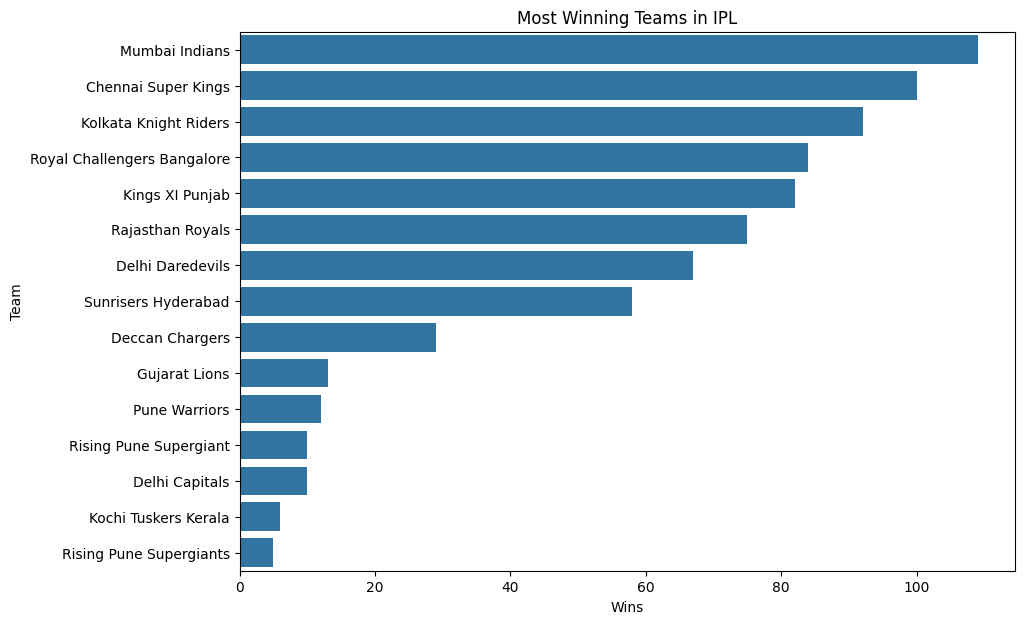

In [18]:
win_counts = matches['winner'].value_counts()

plt.figure(figsize=(10,7))
sns.barplot(x=win_counts.values, y=win_counts.index)
plt.title("Most Winning Teams in IPL")
plt.xlabel("Wins")
plt.ylabel("Team")
plt.savefig("most_winning_teams.png")
plt.show()


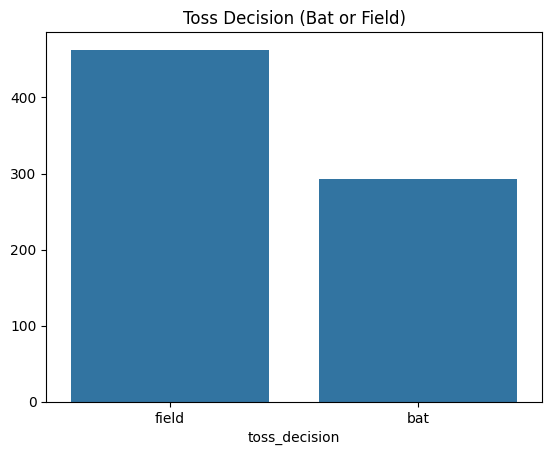

In [17]:
toss_decision = matches['toss_decision'].value_counts()

sns.barplot(x=toss_decision.index, y=toss_decision.values)
plt.title("Toss Decision (Bat or Field)")
plt.savefig("toss_decision.png")
plt.show()


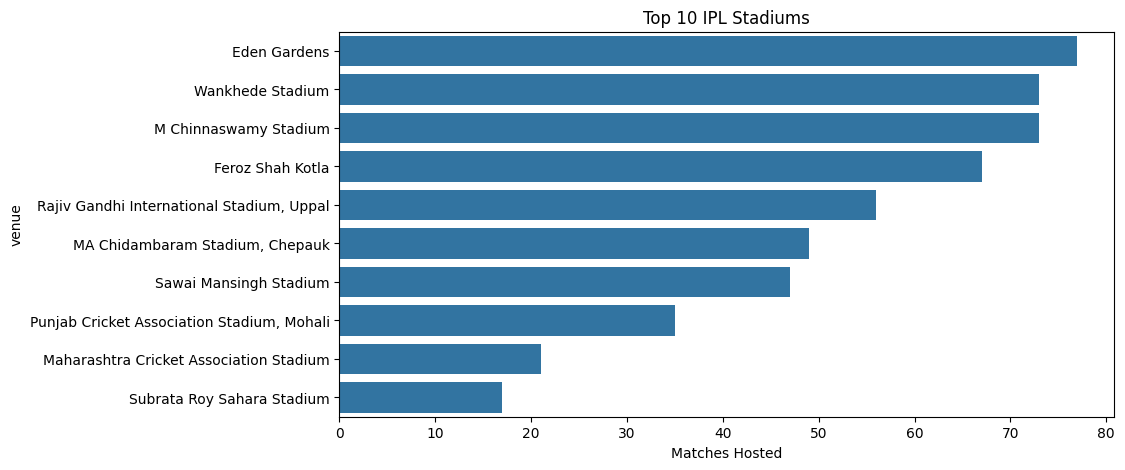

In [16]:
venue_counts = matches['venue'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=venue_counts.values, y=venue_counts.index)
plt.title("Top 10 IPL Stadiums")
plt.xlabel("Matches Hosted")
plt.savefig("top_stadiums.png")
plt.show()


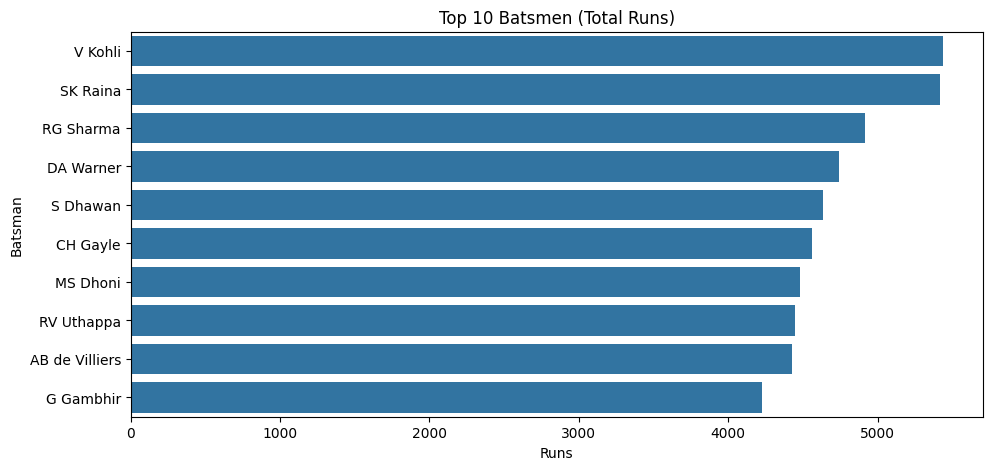

In [15]:
top_batsmen = deliveries.groupby("batsman")['batsman_runs'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(11,5))
sns.barplot(x=top_batsmen.values, y=top_batsmen.index)
plt.title("Top 10 Batsmen (Total Runs)")
plt.xlabel("Runs")
plt.ylabel("Batsman")
plt.savefig("top_batsmen.png")
plt.show()


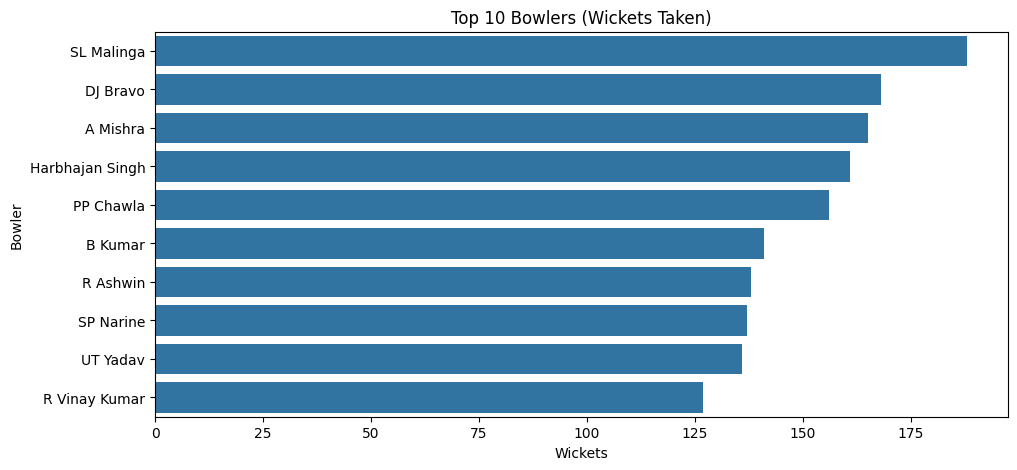

In [14]:
wickets = deliveries[deliveries['dismissal_kind'].notna()]
top_bowlers = wickets['bowler'].value_counts().head(10)

plt.figure(figsize=(11,5))
sns.barplot(x=top_bowlers.values, y=top_bowlers.index)
plt.title("Top 10 Bowlers (Wickets Taken)")
plt.xlabel("Wickets")
plt.ylabel("Bowler")
plt.savefig("wickets.png")
plt.show()


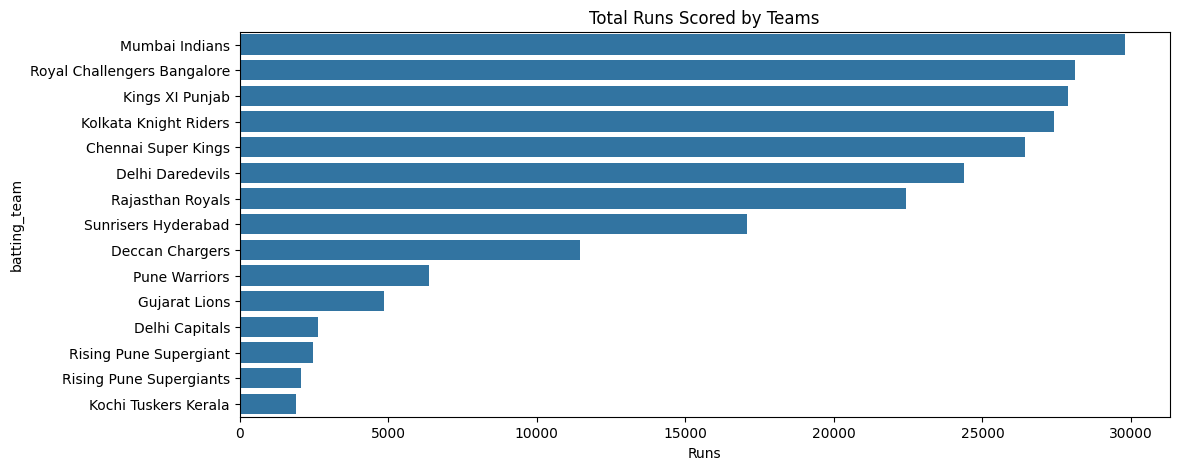

In [13]:
team_runs = deliveries.groupby("batting_team")['total_runs'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,5))
sns.barplot(x=team_runs.values, y=team_runs.index)
plt.title("Total Runs Scored by Teams")
plt.xlabel("Runs")
plt.savefig("team_runs.png")
plt.show()


<Figure size 1200x600 with 0 Axes>

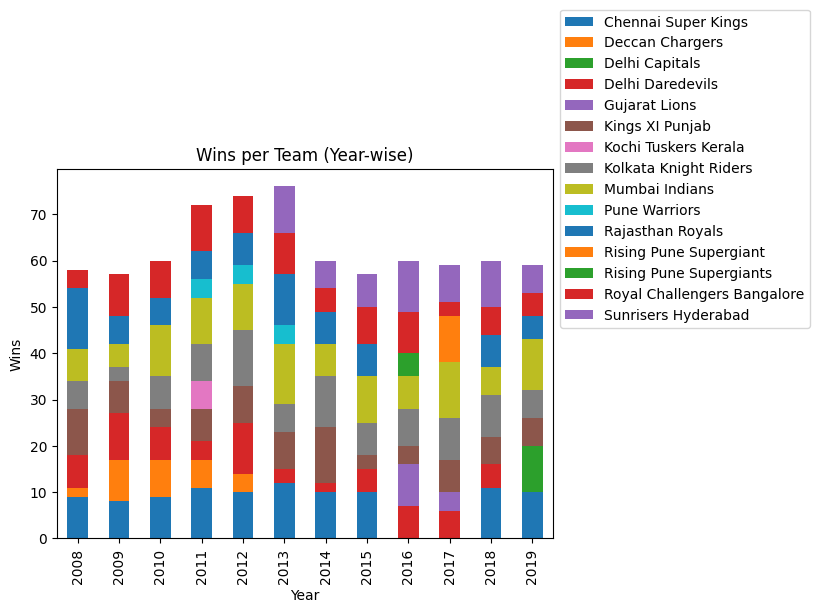

In [12]:
matches['Season_Year'] = matches['Season'].str.replace("IPL-", "").astype(int)

wins_per_year = matches.groupby("Season_Year")['winner'].value_counts().unstack().fillna(0)

plt.figure(figsize=(12,6))
wins_per_year.plot(kind="bar", stacked=True)
plt.title("Wins per Team (Year-wise)")
plt.xlabel("Year")
plt.ylabel("Wins")
plt.legend(loc='center left', bbox_to_anchor=(1,1))
plt.savefig("wins_per_year.png")
plt.show()


<Figure size 1200x600 with 0 Axes>

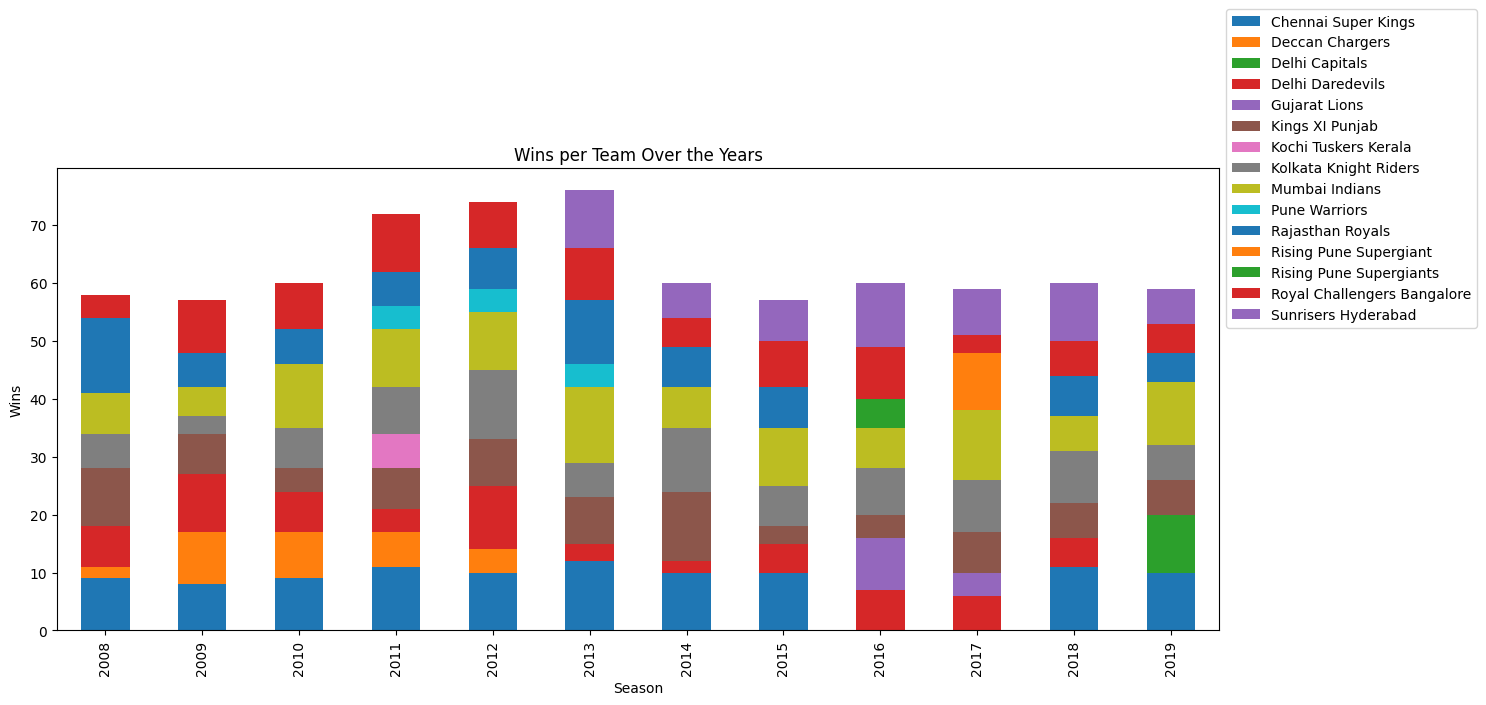

In [11]:
wins_per_year = matches.groupby("Season_Year")['winner'].value_counts().unstack().fillna(0)

plt.figure(figsize=(12,6))
wins_per_year.plot(kind="bar", stacked=True, figsize=(15,6))
plt.title("Wins per Team Over the Years")
plt.xlabel("Season")
plt.ylabel("Wins")
plt.legend(loc='center left', bbox_to_anchor=(1,1))
plt.savefig("wins_per_year.png")
plt.show()